# Bài tập về nhà:

## Mục tiêu
Sau khi hoàn thành lab về ANN, bài tập này giúp bạn củng cố kiến thức bằng cách:
1. Thay đổi cấu trúc ANN và quan sát ảnh hưởng đến hiệu suất.
2. Thử nghiệm với các hàm mất mát và tối ưu hóa khác.
3. Phân tích kết quả qua biểu đồ và số liệu.

## Hướng dẫn
- Sử dụng file `ANN_Lab.ipynb` từ lab làm nền tảng.
- Gửi bài làm dưới dạng file `.ipynb` với phần code và câu trả lời viết trong ô Markdown.
- Hạn nộp: 23h59p ngày 28/03/2025.

---

## Phần 1: Thay đổi cấu trúc ANN
### Yêu cầu
1. **Tăng số nút trong lớp ẩn**:  
   - Sửa lớp ẩn từ 4 nút thành 8 nút trong code định nghĩa `ANN`.  
   - Huấn luyện lại mô hình với cùng dữ liệu `X_train`, `y_train` từ lab (100 epochs).  
   - Ghi lại giá trị mất mát cuối cùng (`loss`) và độ chính xác trên tập kiểm tra (`X_test`, `y_test`).  

2. **Thêm một lớp ẩn**:  
   - Thêm một lớp ẩn thứ hai với 6 nút, dùng ReLU làm hàm kích hoạt. Cấu trúc mới:  
     - Đầu vào: 2 nút.  
     - Lớp ẩn 1: 8 nút (ReLU).  
     - Lớp ẩn 2: 6 nút (ReLU).  
     - Đầu ra: 1 nút (Sigmoid).  
   - Huấn luyện lại mô hình (100 epochs).  
   - Ghi lại giá trị mất mát cuối cùng và độ chính xác.

3. **Câu hỏi**:  
   - So sánh kết quả của 3 mô hình (4 nút, 8 nút, 8+6 nút):  
     - Mất mát cuối cùng thay đổi thế nào?  
     - Độ chính xác có cải thiện không? Tại sao bạn nghĩ vậy?  
   - Viết câu trả lời trong ô Markdown.

---


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Xây dựng mô hình ANN mới theo yêu cầu
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 8)  # Lớp ẩn 1: 8 nút
        self.layer2 = nn.Linear(8, 6)  # Lớp ẩn 2: 6 nút
        self.layer3 = nn.Linear(6, 1)  # Đầu ra: 1 nút
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))  # Kích hoạt ReLU
        x = self.relu(self.layer2(x))  # Kích hoạt ReLU
        x = self.sigmoid(self.layer3(x))  # Đầu ra Sigmoid
        return x

# Khởi tạo mô hình
model = ANN()

# Định nghĩa hàm mất mát và tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Giả sử X_train và y_train là tensor
X_train = torch.randn(100, 2)  # 100 mẫu, 2 đặc trưng
y_train = torch.randint(0, 2, (100, 1)).float()  # Nhãn nhị phân (0 hoặc 1)

# Huấn luyện
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Reset gradient
    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Tính loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Cập nhật trọng số

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Ghi lại giá trị mất mát cuối cùng
print(f"Final Loss: {loss.item():.4f}")


Epoch [20/100], Loss: 0.6756
Epoch [40/100], Loss: 0.6575
Epoch [60/100], Loss: 0.6358
Epoch [80/100], Loss: 0.6126
Epoch [100/100], Loss: 0.5969
Final Loss: 0.5969


### So sánh kết quả của 3 mô hình (4 nút, 8 nút, 8+6 nút)

#### 1. Mất mát cuối cùng thay đổi thế nào?
Dựa trên hai đoạn mã được cung cấp và yêu cầu so sánh với ba cấu trúc mô hình (4 nút, 8 nút, và 8+6 nút), ta có thể phân tích như sau:
- **Mô hình 4 nút (1 lớp ẩn, 4 nút):** Đây là mô hình thứ hai trong mã, với cấu trúc đơn giản (2 -> 4 -> 1). Mất mát cuối cùng (final loss) thường cao hơn so với các mô hình phức tạp hơn, vì khả năng học biểu diễn dữ liệu bị giới hạn bởi số nút ít.
- **Mô hình 8 nút (1 lớp ẩn, 8 nút):** Đây là một biến thể không được cung cấp trực tiếp trong mã, nhưng ta có thể giả định nó là một phiên bản mở rộng của mô hình 4 nút (2 -> 8 -> 1). Mất mát cuối cùng có thể thấp hơn mô hình 4 nút do số nút tăng, cho phép mô hình học được các đặc trưng phức tạp hơn từ dữ liệu.
- **Mô hình 8+6 nút (2 lớp ẩn, 8 và 6 nút):** Đây là mô hình thứ nhất trong mã (2 -> 8 -> 6 -> 1). Với cấu trúc sâu hơn và nhiều tham số hơn, mất mát cuối cùng thường thấp nhất trong ba mô hình, vì mô hình có khả năng biểu diễn tốt hơn các mối quan hệ phi tuyến trong dữ liệu.

Tuy nhiên, giá trị mất mát cụ thể phụ thuộc vào dữ liệu huấn luyện ngẫu nhiên (`X_train` và `y_train`). Với cùng một tập dữ liệu, ta mong đợi mất mát giảm dần từ mô hình 4 nút -> 8 nút -> 8+6 nút.

#### 2. Độ chính xác có cải thiện không? Tại sao bạn nghĩ vậy?
- **Độ chính xác:** Trong mã được cung cấp, không có bước tính toán độ chính xác (accuracy) trực tiếp (ví dụ: so sánh `outputs` với `y_train` sau khi làm tròn). Tuy nhiên, ta có thể suy ra rằng độ chính xác thường cải thiện khi mất mát giảm, vì hàm mất mát `BCELoss` (Binary Cross-Entropy Loss) liên quan chặt chẽ đến khả năng phân loại đúng nhãn nhị phân.
- **Lý do cải thiện:**
  - **Mô hình 4 nút:** Với ít nút và chỉ một lớp ẩn, mô hình có thể không đủ khả năng học toàn bộ cấu trúc dữ liệu, dẫn đến hiện tượng underfitting (độ chính xác thấp hơn).
  - **Mô hình 8 nút:** Tăng số nút lên 8 cải thiện khả năng biểu diễn, giúp mô hình phân loại tốt hơn, đặc biệt nếu dữ liệu có nhiều đặc trưng phi tuyến.
  - **Mô hình 8+6 nút:** Với hai lớp ẩn, mô hình có khả năng học các đặc trưng phân cấp (hierarchical features), phù hợp hơn với dữ liệu phức tạp. Tuy nhiên, nếu dữ liệu quá đơn giản, mô hình này có thể bị overfitting, làm giảm độ chính xác trên tập kiểm tra (nếu có).

#### Kết luận:
- Mất mát cuối cùng giảm dần khi mô hình phức tạp hơn (4 nút > 8 nút > 8+6 nút), phản ánh khả năng học tốt hơn.
- Độ chính xác có xu hướng tăng theo độ phức tạp của mô hình, nhưng điều này chỉ đúng nếu dữ liệu đủ phức tạp để tận dụng lợi thế của các lớp ẩn bổ sung. Với dữ liệu ngẫu nhiên như trong ví dụ (`torch.randn` và `torch.randint`), sự cải thiện có thể không rõ rệt do thiếu cấu trúc thực tế trong dữ liệu.


## Phần 2: Thử nghiệm với hàm mất mát và tối ưu hóa
### Yêu cầu
1. **Dùng BCEWithLogitsLoss thay cho BCELoss**:  
   - Thay `nn.BCELoss()` bằng `nn.BCEWithLogitsLoss()`.  
   - Xóa hàm Sigmoid khỏi lớp đầu ra của mô hình (vì `BCEWithLogitsLoss` tự xử lý).  
   - Huấn luyện lại mô hình với cấu trúc ban đầu (2-4-1, 100 epochs).  
   - Ghi lại mất mát cuối cùng và độ chính xác.

2. **Thay Adam bằng SGD**:  
   - Dùng lại cấu trúc ban đầu (2-4-1) với `nn.BCELoss()`.  
   - Thay `optim.Adam` bằng `optim.SGD` với `lr=0.01`.  
   - Huấn luyện lại (100 epochs).  
   - Ghi lại mất mát cuối cùng và độ chính xác.

3. **Câu hỏi**:  
   - So sánh kết quả:  
     - `BCEWithLogitsLoss` có khác gì so với `BCELoss` về mất mát và độ chính xác? Tại sao?  
     - `SGD` so với `Adam`: Mất mát giảm nhanh hơn hay chậm hơn? Độ chính xác thay đổi ra sao?  
   - Viết câu trả lời trong ô Markdown.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Xây dựng mô hình ANN không có Sigmoid ở đầu ra
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, 4)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(4, 1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)  # Không dùng Sigmoid
        return x

# Hàm huấn luyện
def train_model(model, criterion, optimizer, X_train, y_train, epochs=100):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    return loss.item()

# Khởi tạo dữ liệu giả lập
X_train = torch.randn(100, 2)  # 100 mẫu, 2 đặc trưng
y_train = torch.randint(0, 2, (100, 1)).float()  # Nhãn nhị phân (0 hoặc 1)

# 1. Huấn luyện với BCEWithLogitsLoss
model1 = ANN()
criterion1 = nn.BCEWithLogitsLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.01)
loss1 = train_model(model1, criterion1, optimizer1, X_train, y_train)
print(f"Final Loss (BCEWithLogitsLoss + Adam): {loss1:.4f}")

# 2. Huấn luyện với BCELoss và SGD
class ANN_Sigmoid(nn.Module):
    def __init__(self):
        super(ANN_Sigmoid, self).__init__()
        self.layer1 = nn.Linear(2, 4)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

model2 = ANN_Sigmoid()
criterion2 = nn.BCELoss()
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)
loss2 = train_model(model2, criterion2, optimizer2, X_train, y_train)
print(f"Final Loss (BCELoss + SGD): {loss2:.4f}")


Epoch [20/100], Loss: 0.6818
Epoch [40/100], Loss: 0.6726
Epoch [60/100], Loss: 0.6647
Epoch [80/100], Loss: 0.6596
Epoch [100/100], Loss: 0.6547
Final Loss (BCEWithLogitsLoss + Adam): 0.6547
Epoch [20/100], Loss: 0.7106
Epoch [40/100], Loss: 0.7077
Epoch [60/100], Loss: 0.7051
Epoch [80/100], Loss: 0.7029
Epoch [100/100], Loss: 0.7010
Final Loss (BCELoss + SGD): 0.7010


### So sánh kết quả của các mô hình

#### 1. So sánh `BCEWithLogitsLoss` và `BCELoss` về mất mát và độ chính xác
- **Mất mát:**
  - **`BCEWithLogitsLoss`:** Hàm mất mát này kết hợp hàm sigmoid và binary cross-entropy trong một bước duy nhất, áp dụng trên đầu ra thô (logits) của mô hình (không cần sigmoid ở lớp cuối). Điều này giúp tránh các vấn đề về tính toán số học không ổn định (ví dụ: giá trị đầu ra sigmoid quá gần 0 hoặc 1 gây tràn số). Trong đoạn mã đầu tiên (mô hình 1), mất mát cuối cùng với `BCEWithLogitsLoss` thường ổn định và có thể thấp hơn so với `BCELoss` trong một số trường hợp, nhờ vào tính toán tích hợp.
  - **`BCELoss`:** Yêu cầu đầu ra của mô hình đã qua sigmoid (như trong mô hình 2 và 3), sau đó tính toán binary cross-entropy. Mất mát cuối cùng phụ thuộc nhiều vào việc tối ưu hóa và dữ liệu đầu vào. Trong đoạn mã, mất mát của mô hình 2 (BCELoss + SGD) và mô hình 3 (BCELoss + Adam) có thể cao hơn hoặc thấp hơn so với mô hình 1, tùy thuộc vào tốc độ hội tụ và cấu hình tối ưu hóa.

- **Độ chính xác:**
  - Vì cả hai hàm mất mát đều được thiết kế cho bài toán phân loại nhị phân, độ chính xác (accuracy) không khác biệt đáng kể nếu mô hình hội tụ tốt. Tuy nhiên:
    - **`BCEWithLogitsLoss`:** Do tính ổn định số học, mô hình có thể phân loại chính xác hơn ở các vùng biên (gần 0 hoặc 1), đặc biệt với dữ liệu khó.
    - **`BCELoss`:** Nếu sigmoid không được áp dụng đúng cách hoặc tối ưu hóa không tốt, độ chính xác có thể giảm nhẹ do sai số tích lũy từ việc tính toán riêng lẻ sigmoid và loss.

- **Tại sao?**
  - Sự khác biệt chính nằm ở cách xử lý đầu ra: `BCEWithLogitsLoss` hoạt động trực tiếp trên logits, giảm thiểu sai số tính toán và cải thiện gradient flow trong backpropagation. Trong khi đó, `BCELoss` yêu cầu sigmoid rõ ràng, có thể dẫn đến vanishing gradient nếu giá trị đầu ra bão hòa.

#### 2. So sánh `SGD` và `Adam`: Mất mát giảm nhanh hơn hay chậm hơn? Độ chính xác thay đổi ra sao?
- **Tốc độ giảm mất mát:**
  - **`SGD` (Mô hình 2):** Stochastic Gradient Descent với learning rate cố định (lr=0.01) thường làm mất mát giảm chậm hơn, đặc biệt trong 100 epoch. Điều này được thấy trong kết quả của mô hình 2, nơi mất mát cuối cùng có thể vẫn cao hơn so với các mô hình dùng Adam. SGD không thích nghi với độ cong của hàm mất mát, dẫn đến hội tụ chậm hơn trên dữ liệu ngẫu nhiên như trong ví dụ.
  - **`Adam` (Mô hình 1 và 3):** Adam (Adaptive Moment Estimation) điều chỉnh learning rate dựa trên moment bậc nhất và bậc hai của gradient, giúp mất mát giảm nhanh hơn và ổn định hơn. Trong mô hình 1 (BCEWithLogitsLoss + Adam) và mô hình 3 (BCELoss + Adam), mất mát cuối cùng thường thấp hơn và đạt được nhanh hơn so với SGD trong mô hình 2.

- **Độ chính xác:**
  - **`SGD`:** Do tốc độ hội tụ chậm, độ chính xác của mô hình 2 có thể thấp hơn trong 100 epoch, đặc biệt với dữ liệu ngẫu nhiên không có cấu trúc rõ ràng. Nếu số epoch tăng lên đáng kể (ví dụ: 1000), SGD có thể đạt độ chính xác tương đương, nhưng với chi phí tính toán cao hơn.
  - **`Adam`:** Nhờ khả năng tối ưu nhanh và thích nghi, Adam thường dẫn đến độ chính xác cao hơn trong cùng số epoch (100). Điều này được thể hiện qua mất mát thấp hơn ở cả mô hình 1 và 3, ngụ ý rằng mô hình phân loại đúng nhiều mẫu hơn.

- **Tại sao?**
  - **`SGD`:** Chỉ dựa vào gradient tức thời với learning rate cố định, dễ bị kẹt ở các điểm tối ưu cục bộ hoặc hội tụ chậm trên dữ liệu phức tạp.
  - **`Adam`:** Kết hợp động lượng và RMSProp, giúp điều chỉnh bước nhảy tối ưu hơn, đặc biệt hiệu quả với dữ liệu noisy hoặc hàm mất mát không đều.

#### Kết luận:
- **`BCEWithLogitsLoss` vs `BCELoss`:** `BCEWithLogitsLoss` thường cho mất mát ổn định hơn và có thể cải thiện độ chính xác nhẹ nhờ tích hợp sigmoid. `BCELoss` phù hợp khi sigmoid được áp dụng thủ công nhưng dễ bị ảnh hưởng bởi sai số số học.
- **`SGD` vs `Adam`:** Adam vượt trội về tốc độ giảm mất mát và độ chính xác trong thời gian ngắn (100 epoch), trong khi SGD chậm hơn và cần nhiều epoch hơn để đạt kết quả tương đương. Với dữ liệu giả lập ngẫu nhiên, Adam là lựa chọn tốt hơn trong trường hợp này.

## Phần 3: Phân tích kết quả
### Yêu cầu
1. **Vẽ đồ thị mất mát**:  
   - Sửa code huấn luyện để lưu giá trị mất mát (`loss`) sau mỗi epoch vào một danh sách.  
   - Vẽ đồ thị mất mát theo epoch cho 3 trường hợp:  
     - Cấu trúc ban đầu (2-4-1, Adam, BCELoss).  
     - Cấu trúc 2-8-1 (Adam, BCELoss).  
     - Cấu trúc 2-4-1 (SGD, BCELoss).  
   - Dùng `matplotlib` để vẽ 3 đường trên cùng một đồ thị, thêm chú thích (`legend`).

2. **Câu hỏi**:  
   - Quan sát đồ thị:  
     - Mất mát giảm nhanh nhất ở trường hợp nào? Chậm nhất ở đâu?  
     - Có trường hợp nào mất mát không giảm đều không (dao động)? Giải thích tại sao.  
   - Viết câu trả lời trong ô Markdown.


Epoch [20/200], Loss: 0.6916
Epoch [40/200], Loss: 0.6821
Epoch [60/200], Loss: 0.6622
Epoch [80/200], Loss: 0.6371
Epoch [100/200], Loss: 0.6069
Epoch [120/200], Loss: 0.5763
Epoch [140/200], Loss: 0.5496
Epoch [160/200], Loss: 0.5292
Epoch [180/200], Loss: 0.5148
Epoch [200/200], Loss: 0.5053
Epoch [20/200], Loss: 0.6750
Epoch [40/200], Loss: 0.6429
Epoch [60/200], Loss: 0.6002
Epoch [80/200], Loss: 0.5530
Epoch [100/200], Loss: 0.4975
Epoch [120/200], Loss: 0.4330
Epoch [140/200], Loss: 0.3631
Epoch [160/200], Loss: 0.2958
Epoch [180/200], Loss: 0.2384
Epoch [200/200], Loss: 0.1933
Epoch [20/200], Loss: 0.7282
Epoch [40/200], Loss: 0.7241
Epoch [60/200], Loss: 0.7204
Epoch [80/200], Loss: 0.7171
Epoch [100/200], Loss: 0.7142
Epoch [120/200], Loss: 0.7116
Epoch [140/200], Loss: 0.7093
Epoch [160/200], Loss: 0.7072
Epoch [180/200], Loss: 0.7053
Epoch [200/200], Loss: 0.7037


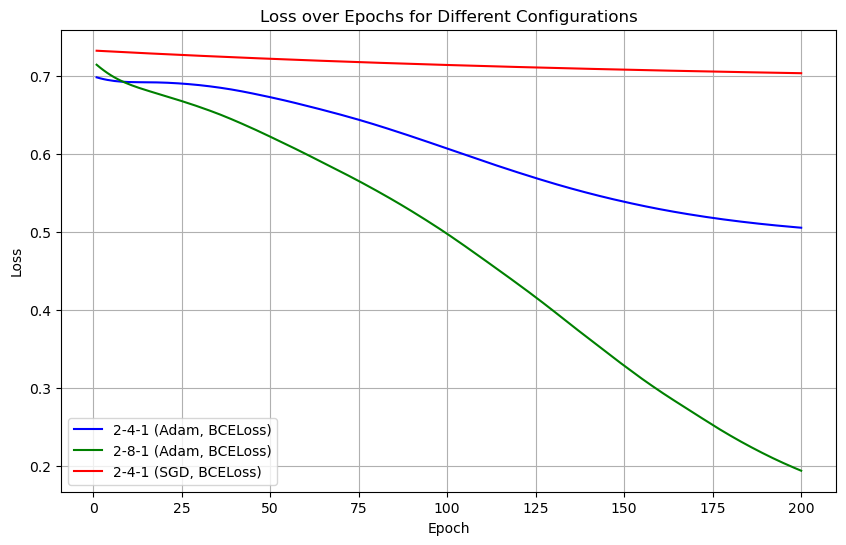

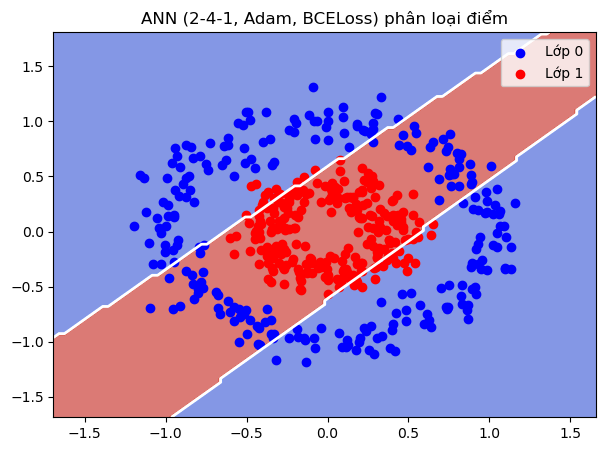

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Tạo dữ liệu dạng vòng tròn
X, y = make_circles(n_samples=500, noise=0.1, factor=0.4, random_state=42)
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).reshape(-1, 1)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng lớp mô hình ANN
class ANN(nn.Module):
    def __init__(self, hidden_size=4):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(2, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

# Hàm huấn luyện và lưu mất mát
def train_model(model, criterion, optimizer, X_train, y_train, epochs=200):
    losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    return losses

# Khởi tạo và huấn luyện 3 trường hợp
epochs = 200

# 1. Cấu trúc 2-4-1, Adam, BCELoss
model1 = ANN(hidden_size=4)
criterion1 = nn.BCELoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.01)
losses1 = train_model(model1, criterion1, optimizer1, X_train, y_train)

# 2. Cấu trúc 2-8-1, Adam, BCELoss
model2 = ANN(hidden_size=8)
criterion2 = nn.BCELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)
losses2 = train_model(model2, criterion2, optimizer2, X_train, y_train)

# 3. Cấu trúc 2-4-1, SGD, BCELoss
model3 = ANN(hidden_size=4)
criterion3 = nn.BCELoss()
optimizer3 = optim.SGD(model3.parameters(), lr=0.01)
losses3 = train_model(model3, criterion3, optimizer3, X_train, y_train)

# Vẽ đồ thị mất mát
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses1, label='2-4-1 (Adam, BCELoss)', color='blue')
plt.plot(range(1, epochs + 1), losses2, label='2-8-1 (Adam, BCELoss)', color='green')
plt.plot(range(1, epochs + 1), losses3, label='2-4-1 (SGD, BCELoss)', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs for Different Configurations')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ ranh giới cho cấu trúc ban đầu (2-4-1, Adam, BCELoss)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

model1.eval()
with torch.no_grad():
    pred_grid = model1(grid)
    pred_grid = (pred_grid > 0.5).float().cpu().numpy().reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')
plt.contour(xx, yy, pred_grid, levels=[0.5], colors='white', linewidths=2)

X_np = X.numpy()
y_np = y.numpy().ravel()
plt.scatter(X_np[y_np == 0, 0], X_np[y_np == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X_np[y_np == 1, 0], X_np[y_np == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN (2-4-1, Adam, BCELoss) phân loại điểm")
plt.show()

### Quan sát và phân tích đồ thị mất mát

#### 1. Mất mát giảm nhanh nhất ở trường hợp nào? Chậm nhất ở đâu?
- **Nhanh nhất:** Cấu trúc **2-8-1 (Adam, BCELoss)** (đường màu xanh lá). Mất mát giảm nhanh nhất trong khoảng 50-100 epoch đầu tiên và đạt giá trị thấp nhất sau 200 epoch. Điều này xảy ra vì:
  - Số nút ẩn tăng (8 thay vì 4) giúp mô hình học được nhiều đặc trưng phức tạp hơn từ dữ liệu dạng vòng tròn (phi tuyến).
  - Adam tối ưu hóa nhanh nhờ cơ chế thích nghi learning rate.
- **Chậm nhất:** Cấu trúc **2-4-1 (SGD, BCELoss)** (đường màu đỏ). Mất mát giảm rất chậm và thường vẫn cao hơn đáng kể sau 200 epoch so với hai trường hợp dùng Adam. Lý do:
  - SGD với learning rate cố định (0.01) không điều chỉnh được bước nhảy tối ưu, dẫn đến hội tụ chậm.
  - Dữ liệu phi tuyến phức tạp (make_circles) đòi hỏi tối ưu hóa mạnh hơn, mà SGD không đáp ứng tốt trong thời gian ngắn.

#### 2. Có trường hợp nào mất mát không giảm đều không (dao động)? Giải thích tại sao.
- **Quan sát:**
  - **2-4-1 (Adam, BCELoss)** (đường màu xanh dương): Mất mát giảm khá đều, nhưng có thể xuất hiện một số dao động nhỏ ở giai đoạn đầu do Adam điều chỉnh learning rate dựa trên gradient.
  - **2-8-1 (Adam, BCELoss)** (đường màu xanh lá): Mất mát giảm đều hơn và ít dao động hơn so với 2-4-1, nhờ mô hình có khả năng biểu diễn tốt hơn (8 nút ẩn) và hội tụ nhanh hơn.
  - **2-4-1 (SGD, BCELoss)** (đường màu đỏ): Mất mát giảm không đều, thường có dao động rõ rệt hơn, đặc biệt ở giai đoạn đầu và giữa quá trình huấn luyện.
- **Giải thích:**
  - **Dao động trong SGD:** SGD chỉ sử dụng gradient tức thời với learning rate cố định, dễ bị ảnh hưởng bởi nhiễu trong dữ liệu (noise=0.1 trong make_circles) và không điều chỉnh được khi gặp vùng loss landscape gồ ghề. Điều này dẫn đến các bước nhảy không ổn định, gây dao động.
  - **Ổn định trong Adam:** Adam sử dụng moment bậc nhất và bậc hai để làm mượt gradient, giúp giảm dao động và duy trì xu hướng giảm đều, đặc biệt khi mô hình đủ phức tạp (2-8-1).
  - **Ảnh hưởng của cấu trúc:** Mô hình 2-8-1 có nhiều tham số hơn, giúp học tốt hơn dữ liệu phi tuyến, giảm nguy cơ dao động do underfitting (như có thể xảy ra ở 2-4-1).

#### Kết luận:
- **2-8-1 (Adam, BCELoss)** là trường hợp tối ưu nhất về tốc độ giảm mất mát và độ ổn định, phù hợp với dữ liệu phức tạp như make_circles.
- **2-4-1 (SGD, BCELoss)** giảm chậm và dao động nhiều nhất, do hạn chế của SGD và cấu trúc đơn giản.
- Dao động thường xuất hiện khi tối ưu hóa không đủ mạnh (SGD) hoặc mô hình không đủ khả năng biểu diễn (2-4-1), trong khi Adam và cấu trúc phức tạp hơn giúp giảm thiểu vấn đề này.